In [9]:
import pandas as pd 
import numpy as np 
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter 
from textblob import TextBlob
# stopwords = set(STOPWORDS) 
import pickle
# import pyLDAvis.sklearn
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics



In [2]:
stops = set(stopwords.words("english"))

In [3]:
# final=pd.read_csv('final.csv')

In [4]:
# final

In [5]:
# entire =final.copy()
# # entire

In [3]:

def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [7]:
# entire2=entire.loc[:,:]
# entire2

In [8]:
# entire2['Text']=entire2['Text'].map(lambda x: cleantext(x))

### Splitting the data 

In [9]:
# from fast_ml.model_development import train_valid_test_split

In [10]:
# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(entire2, target ='Label',
#                                                                             train_size=0.8,
#                                                                             valid_size=0.1,
#                                                                             test_size=0.1,
#                                                                             random_state=42
#                                                                            )

In [11]:
# X_train.to_csv('X_train.csv',index=False)
# X_valid.to_csv('X_valid.csv',index=False)
# X_test.to_csv('X_test.csv',index=False)
# y_train=list(y_train)
# y_valid=list(y_valid)
# y_test=list(y_test)
# np.save('y_train.npy',y_train)
# np.save('y_valid.npy',y_valid)
# np.save('y_test.npy',y_test)

In [10]:
X_train=pd.read_csv('X_train.csv')
X_valid=pd.read_csv('X_valid.csv')
X_test=pd.read_csv('X_test.csv')
y_train=np.load('y_train.npy')
y_valid=np.load('y_valid.npy')
y_test=np.load('y_test.npy')

In [13]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

### Implementing ML Models 

###  Implementing Logistic Regression

In [14]:
X_train['Text'].dtypes

dtype('O')

Logistic Regression
val:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1456
           1       0.84      0.86      0.85      1127

    accuracy                           0.87      2583
   macro avg       0.87      0.87      0.87      2583
weighted avg       0.87      0.87      0.87      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Linear Regression on val data')

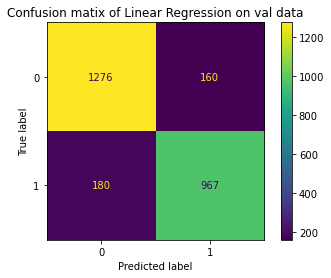

In [15]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(X_train['Text'],y_train)
print('Logistic Regression')
print ('val:')
pred=pipeline.predict(X_valid['Text'])


print(metrics.classification_report(pred,y_valid))
cm=plot_confusion_matrix(fit,X=X_valid['Text'],y_true=y_valid,normalize = None) 
                      #title = 'Confusion matix of LR on val data')
cm.ax_.set_title('Confusion matix of Linear Regression on val data')

### On test dataset

Logistic Regression 
test:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1386
           1       0.87      0.86      0.86      1197

    accuracy                           0.87      2583
   macro avg       0.87      0.87      0.87      2583
weighted avg       0.87      0.87      0.87      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Linear Regression on test data')

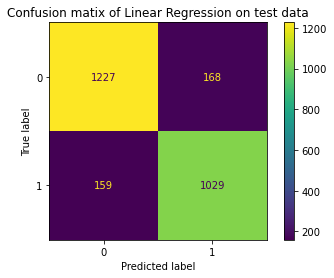

In [16]:
print('Logistic Regression ')
print ('test:')
pred_LR=pipeline.predict(X_test['Text'])
np.save('pred_LR.npy',pred_LR)


print(metrics.classification_report(pred_LR,y_test))
LR_report=metrics.classification_report(pred_LR,y_test,output_dict=True)
LR_report=pd.DataFrame(LR_report).transpose()
LR_report.to_csv('LR_report.csv',index=False)
cm=plot_confusion_matrix(fit,X=X_test['Text'],y_true=y_test,normalize = None) 
                      #title = 'Confusion matix of LR on test data')
cm.ax_.set_title('Confusion matix of Linear Regression on test data')

In [17]:
text=['WHO claims covid does not need cure']
text=[cleantext(str) for str in text]
predtext=pipeline.predict(text)
predtext

array([1])

### Tuning Hyperparameters for LR 

In [18]:
param_grid =[ {'clf__C': np.logspace(-4, 4, 50),
              'clf__solver' : ['liblinear'],
             'clf__penalty':['l1'],
              'clf__max_iter':[10000]},
             {'clf__C': np.logspace(-4, 4, 50),
              'clf__solver' : ['lbfgs','newton-cg'],
             'clf__penalty':['l2'],
             'clf__max_iter':[10000]}]
             

pipeline_tuning = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),  
        ('clf',LogisticRegression(random_state=0) )
    ])

best_model=GridSearchCV(pipeline_tuning, param_grid,cv=5, verbose=0,n_jobs=-1)
best_model.fit(X_train['Text'],y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test['Text'],y_test))

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=7.9060432109076855, max_iter=10000,
                                    random_state=0))])
The mean accuracy of the model is: 0.8780487804878049


### Applying the best model in LR 

Best Logistic Regression
test:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1386
           1       0.87      0.86      0.86      1197

    accuracy                           0.87      2583
   macro avg       0.87      0.87      0.87      2583
weighted avg       0.87      0.87      0.87      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Best Linear Regression model  on test data')

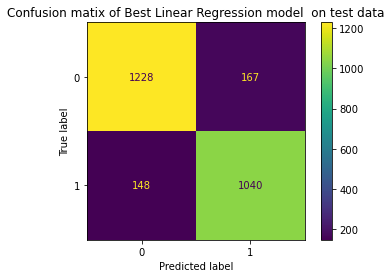

In [19]:
pipeline_bestModel = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),  
        ('clf',LogisticRegression(C=7.9060432109076855,random_state=0,max_iter=10000) )
    ])
fit_best = pipeline_bestModel.fit(X_train['Text'],y_train)
print('Best Logistic Regression')
print ('test:')
pred_LR_best=pipeline.predict(X_test['Text'])
np.save('pred_LR_best.npy',pred_LR_best)


print(metrics.classification_report(pred_LR_best,y_test))

LR_best_report=metrics.classification_report(pred_LR_best,y_test,output_dict=True)
LR_best_report=pd.DataFrame(LR_best_report).transpose()
LR_best_report.to_csv('LR_best_report.csv',index=False)
LR_best_output={'Text':X_test['Text'],'Label':y_test,'pred_LR_best':pred_LR_best}
LR_best_output=pd.DataFrame(LR_best_output)
LR_best_output.to_csv('LR_best_output.csv',index=False)
cm=plot_confusion_matrix(fit_best,X=X_test['Text'],y_true=y_test,normalize = None) 
                      #title = 'Confusion matix of LR on test data')
cm.ax_.set_title('Confusion matix of Best Linear Regression model  on test data')

In [20]:
LR_best_report

,precision,recall,f1-score,support
0,0.879570,0.885281,0.882416,1386.000000
1,0.866162,0.859649,0.862893,1197.000000
accuracy,0.873403,0.873403,0.873403,0.873403
macro avg,0.872866,0.872465,0.872655,2583.000000
weighted avg,0.873356,0.873403,0.873369,2583.000000


In [21]:
filename='best_LR_model.sav'
pickle.dump(fit_best, open(filename, 'wb'))

In [22]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test['Text'], y_test)
print(result)

0.8780487804878049


### Implementing Linear Support Vector Machine

SVM
valid:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1452
           1       0.86      0.88      0.87      1131

    accuracy                           0.88      2583
   macro avg       0.88      0.88      0.88      2583
weighted avg       0.88      0.88      0.88      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of SVM on valid data')

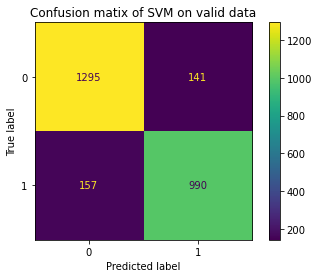

In [23]:
pipelineSVM = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipelineSVM.fit(X_train['Text'],y_train)
print('SVM')
print ('valid:')
pred=pipelineSVM.predict(X_valid['Text'])
print(metrics.classification_report(pred,y_valid))


cm=plot_confusion_matrix(fit,X=X_valid['Text'],y_true=y_valid, normalize = None )
cm.ax_.set_title('Confusion matix of SVM on valid data')





### On test Set 

SVM
test:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1383
           1       0.87      0.86      0.87      1200

    accuracy                           0.88      2583
   macro avg       0.87      0.87      0.87      2583
weighted avg       0.88      0.88      0.88      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of SVM on test data')

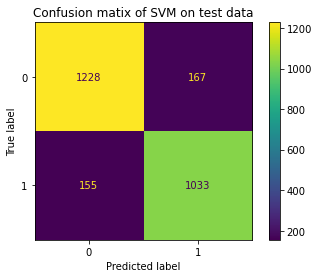

In [24]:
print('SVM')
print ('test:')
pred_SVM=pipelineSVM.predict(X_test['Text'])
np.save('pred_SVM.npy',pred_SVM)

print(metrics.classification_report(pred_SVM,y_test))

SVM_report=metrics.classification_report(pred_SVM,y_test,output_dict=True)
SVM_report=pd.DataFrame(SVM_report).transpose()
SVM_report.to_csv('SVM_report.csv',index=False)


cm=plot_confusion_matrix(fit,X=X_test['Text'],y_true=y_test, normalize = None, 
                        )#title = 'Confusion matix of SVM on test data')
cm.ax_.set_title('Confusion matix of SVM on test data')

In [25]:
filename='SVM_model.sav'
pickle.dump(pipelineSVM, open(filename, 'wb'))


In [26]:

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test['Text'], y_test)
# print(result)

In [27]:
text=['WHO ']
text=[cleantext(str) for str in text]
predtext=pipelineSVM.predict(text)
predtext

array([0])

### Implementing Gradient Boost 

GradientBoostingClassifier()
val:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1636
           1       0.69      0.84      0.76       947

    accuracy                           0.80      2583
   macro avg       0.79      0.81      0.79      2583
weighted avg       0.82      0.80      0.80      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Gradient Boosting Classifier on val data')

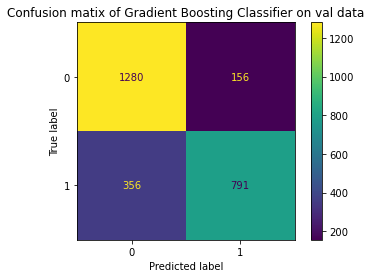

In [28]:
pipelineGB = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipelineGB.fit(X_train['Text'],y_train)
print('GradientBoostingClassifier()')
print ('val:')
pred=pipelineGB.predict(X_valid['Text'])

print(metrics.classification_report(pred,y_valid))
cm=plot_confusion_matrix(fit,X=X_valid['Text'],y_true=y_valid, normalize = None) 
                      #title = 'Confusion matix of GB on val data')
cm.ax_.set_title('Confusion matix of Gradient Boosting Classifier on val data')

### On test set

GradientBoostingClassifier()
test:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1561
           1       0.70      0.82      0.76      1022

    accuracy                           0.79      2583
   macro avg       0.79      0.80      0.79      2583
weighted avg       0.80      0.79      0.79      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Gradient Boosting Classifier on test data')

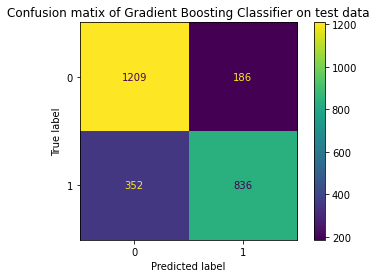

In [29]:
print('GradientBoostingClassifier()')
print ('test:')
pred_GB=pipelineGB.predict(X_test['Text'])
np.save('pred_GB.npy',pred_GB)
print(metrics.classification_report(pred_GB,y_test))
GB_report=metrics.classification_report(pred_GB,y_test,output_dict=True)
GB_report=pd.DataFrame(GB_report).transpose()
GB_report.to_csv('GB_report.csv',index=False)

cm=plot_confusion_matrix(fit,X=X_test['Text'],y_true=y_test, normalize = None) 
                      #title = 'Confusion matix of GB on test data')
cm.ax_.set_title('Confusion matix of Gradient Boosting Classifier on test data')

In [30]:
text=['WHO claims covid does not need cure']
text=[cleantext(str) for str in text]
predtext=pipelineGB.predict(text)
predtext

array([1])

###  Implementing Descision Tree Classifier

Descision Tree
val:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1402
           1       0.83      0.80      0.82      1181

    accuracy                           0.83      2583
   macro avg       0.83      0.83      0.83      2583
weighted avg       0.83      0.83      0.83      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Descision Tree Classifier on val data')

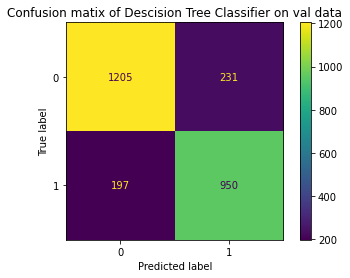

In [31]:
pipelineDT = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c',tree.DecisionTreeClassifier())
    ])
fit = pipelineDT.fit(X_train['Text'],y_train)

print('Descision Tree')
print ('val:')
pred=pipelineDT.predict(X_valid['Text'])

print(metrics.classification_report(pred,y_valid))

cm=plot_confusion_matrix(fit,X=X_valid['Text'],y_true=y_valid, normalize = None) 
                      #title = 'Confusion matix of LR on val data')
cm.ax_.set_title('Confusion matix of Descision Tree Classifier on val data')

### DT on test set 

Descision Tree
test:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1378
           1       0.82      0.80      0.81      1205

    accuracy                           0.82      2583
   macro avg       0.82      0.82      0.82      2583
weighted avg       0.82      0.82      0.82      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Descision Tree Classifier on test data')

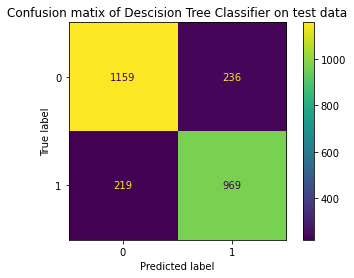

In [32]:
print('Descision Tree')
print ('test:')
pred_DT=pipelineDT.predict(X_test['Text'])
np.save('pred_DT.npy',pred_DT)

print(metrics.classification_report(pred_DT,y_test))
DT_report=metrics.classification_report(pred_DT,y_test,output_dict=True)
DT_report=pd.DataFrame(DT_report).transpose()
DT_report.to_csv('DT_report.csv',index=False)

cm=plot_confusion_matrix(fit,X=X_test['Text'],y_true=y_test, normalize = None) 
                      #title = 'Confusion matix of DT on test data')
cm.ax_.set_title('Confusion matix of Descision Tree Classifier on test data')

In [33]:
text=['WHO claims covid does not need cure']
text=[cleantext(str) for str in text]
predtext=pipelineDT.predict(text)
predtext

array([1])

###  NB

In [11]:
from sklearn.naive_bayes import MultinomialNB

Descision Tree
val:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1521
           1       0.80      0.87      0.83      1062

    accuracy                           0.86      2583
   macro avg       0.85      0.86      0.85      2583
weighted avg       0.86      0.86      0.86      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Multinomial NB Classifier on val data')

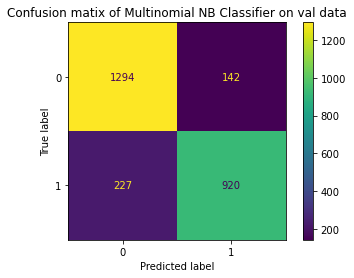

In [12]:
pipelineNB=Pipeline([('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c',MultinomialNB())
    ])
fit = pipelineNB.fit(X_train['Text'],y_train)
print('Descision Tree')
print ('val:')
pred=pipelineNB.predict(X_valid['Text'])

print(metrics.classification_report(pred,y_valid))

cm=plot_confusion_matrix(fit,X=X_valid['Text'],y_true=y_valid, normalize = None) 
                      #title = 'Confusion matix of LR on val data')
cm.ax_.set_title('Confusion matix of Multinomial NB Classifier on val data')

Multinomial Naive Bayes
test:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1455
           1       0.82      0.86      0.84      1128

    accuracy                           0.86      2583
   macro avg       0.85      0.86      0.85      2583
weighted avg       0.86      0.86      0.86      2583



C:\Users\sah-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matix of Multinomial NB Classifier on test data')

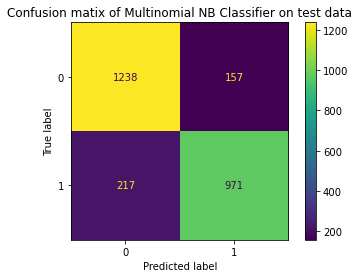

In [16]:
print('Multinomial Naive Bayes')
print ('test:')
pred_NB=pipelineNB.predict(X_test['Text'])
np.save('pred_NB.npy',pred_NB)

print(metrics.classification_report(pred_NB,y_test))
NB_report=metrics.classification_report(pred_NB,y_test,output_dict=True)
NB_report=pd.DataFrame(NB_report).transpose()
NB_report.to_csv('NB_report.csv',index=False)

cm=plot_confusion_matrix(fit,X=X_test['Text'],y_true=y_test, normalize = None) 
                      #title = 'Confusion matix of NB on test data')
cm.ax_.set_title('Confusion matix of Multinomial NB Classifier on test data')

In [14]:
filename='NB_model.sav'
pickle.dump(pipelineNB, open(filename, 'wb'))